In [1]:
%matplotlib inline

In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [3]:
# import csv
housing_data_df = pd.read_csv("Resources/housing.csv")
housing_data_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_data_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing_data_df.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

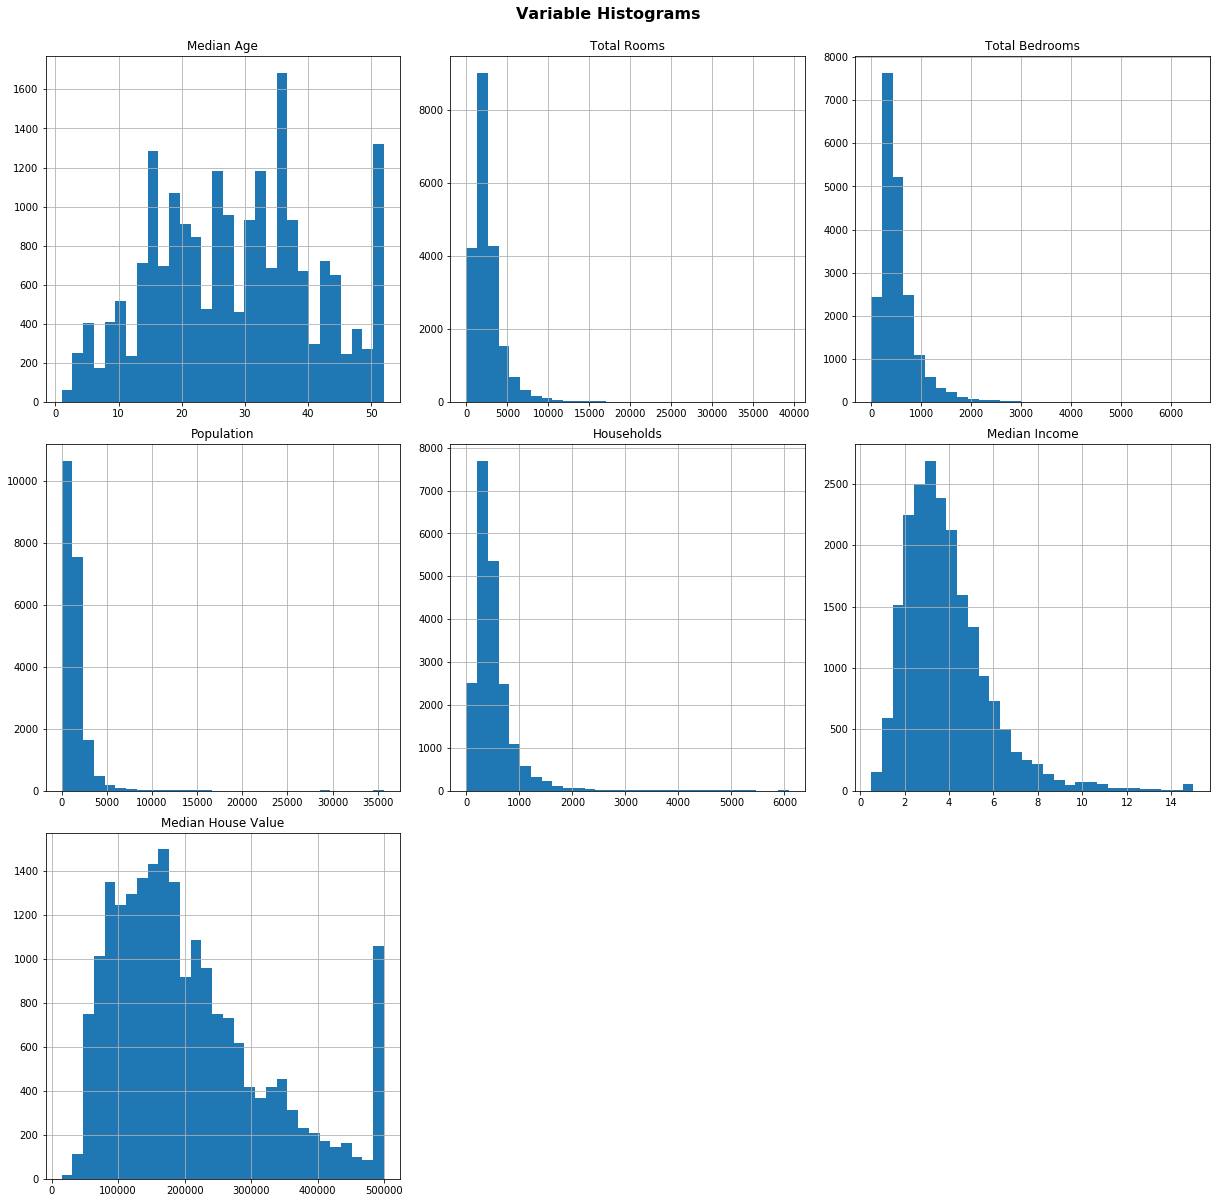

In [7]:
# set figure, axes, title
fig1, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 17))
fig1.suptitle("Variable Histograms", fontweight='bold', fontsize=16)

# housing median age histogram
housing_data_df.housing_median_age.hist(bins=30, ax=axes[0][0])
axes[0][0].set_title("Median Age")

# total rooms histogram
housing_data_df.total_rooms.hist(bins=30, ax=axes[0][1])
axes[0][1].set_title("Total Rooms")

# total bedrooms histogram
housing_data_df.total_bedrooms.hist(bins=30, ax=axes[0][2])
axes[0][2].set_title("Total Bedrooms")

# population histogram
housing_data_df.population.hist(bins=30, ax=axes[1][0])
axes[1][0].set_title("Population")

# households histogram
housing_data_df.households.hist(bins=30, ax=axes[1][1])
axes[1][1].set_title("Households")

# median income histogram
housing_data_df.median_income.hist(bins=30, ax=axes[1][2])
axes[1][2].set_title("Median Income")

# median house value histogram
housing_data_df.median_house_value.hist(bins=30, ax=axes[2][0])
axes[2][0].set_title("Median House Value")

# hide unused axes
axes[2][1].axis(False)
axes[2][2].axis(False)

# adjust layout and title position
fig1.tight_layout()
fig1.subplots_adjust(top=0.94)

# show plot
plt.show()


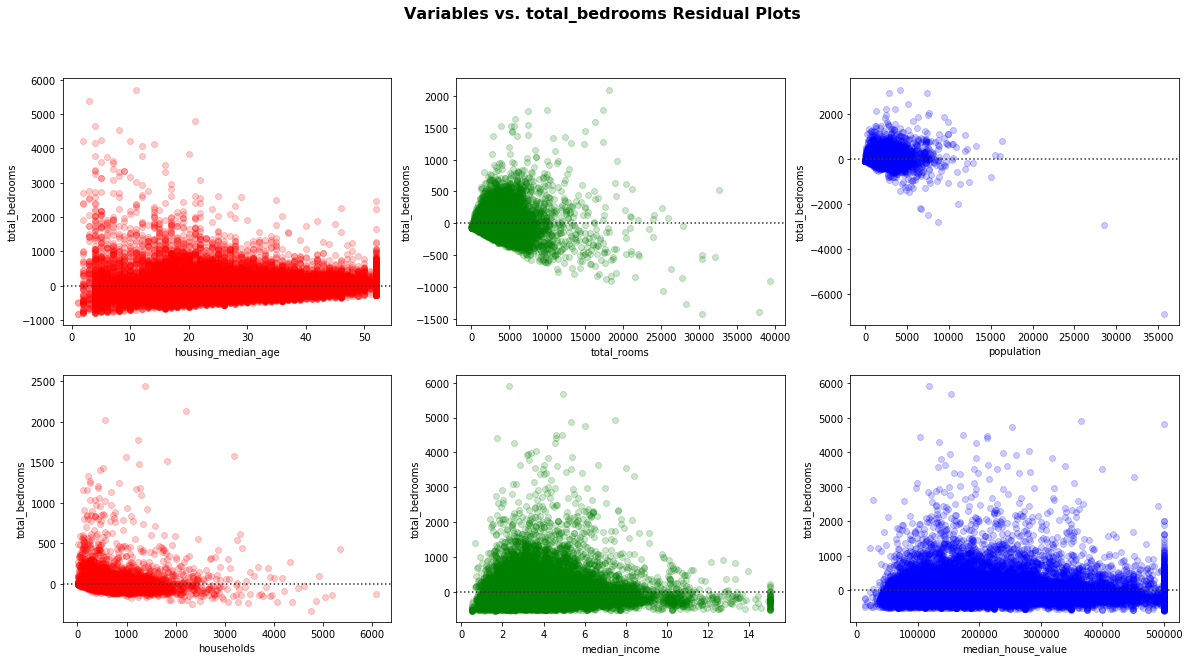

In [8]:
# residual plots of all ofther variables against total_bedrooms
fig2, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig2.suptitle("Variables vs. total_bedrooms Residual Plots", fontsize=16, fontweight='bold')

y_val = housing_data_df.total_bedrooms

# median_age
x = housing_data_df.housing_median_age
sns.residplot(x, y_val, color='r', ax=ax1, scatter_kws={'alpha':0.2}, dropna=True)

# total_rooms
x = housing_data_df.total_rooms
sns.residplot(x, y_val, color='g', ax=ax2, scatter_kws={'alpha':0.2}, dropna=True)

# population
x = housing_data_df.population
sns.residplot(x, y_val, color='b', ax=ax3, scatter_kws={'alpha':0.2}, dropna=True)

# households
x = housing_data_df.households
sns.residplot(x, y_val, color='r', ax=ax4, scatter_kws={'alpha':0.2}, dropna=True)

# median_income
x = housing_data_df.median_income
sns.residplot(x, y_val, color='g', ax=ax5, scatter_kws={'alpha':0.2}, dropna=True)

# median_house_value
x = housing_data_df.median_house_value
sns.residplot(x, y_val, color='b', ax=ax6, scatter_kws={'alpha':0.2}, dropna=True)

# show plot
plt.show()


In [9]:
# grab non-null values from rooms and bedrooms
room_df = housing_data_df[["households", "total_bedrooms"]].dropna()

reg_x = room_df["households"]
reg_y = room_df["total_bedrooms"]

# calculate linear regression
(rooms_m, rooms_b, rooms_r, rooms_p, rooms_sterr) = stats.linregress(reg_x, reg_y)
print(rooms_r)


0.9797282708045646


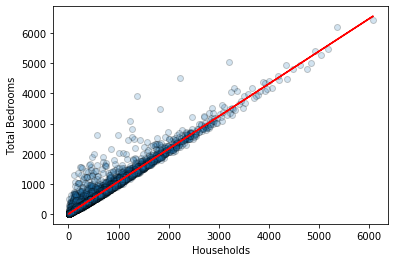

In [10]:
# set plot
fig3, ax = plt.subplots()

# plot households vs bedrooms
ax.scatter(reg_x, reg_y, alpha = 0.2, edgecolor = 'k')

# plot regression line
reg_line = rooms_m * reg_x + rooms_b
ax.plot(reg_x, reg_line, color = 'r')

# set x.y labels
ax.set_xlabel("Households")
ax.set_ylabel("Total Bedrooms")

# show plot
plt.show()


In [11]:
# x_val = housing_data_df.households
# sns.regplot(x_val, y_val, scatter_kws={'alpha':0.2, 'edgecolor':'k'}, line_kws={'color':'r'})
# plt.show()


In [12]:
# replace null bedrooms with predicted bedrooms from linear regression based on total_rooms
housing_data_df.loc[housing_data_df["total_bedrooms"].isnull(),"total_bedrooms"] = \
        np.floor(rooms_m * housing_data_df["total_rooms"] + rooms_b)

housing_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
